  0.353423 seconds (9.09 M allocations: 234.760 MiB, 20.22% gc time, 8.08% compilation time)


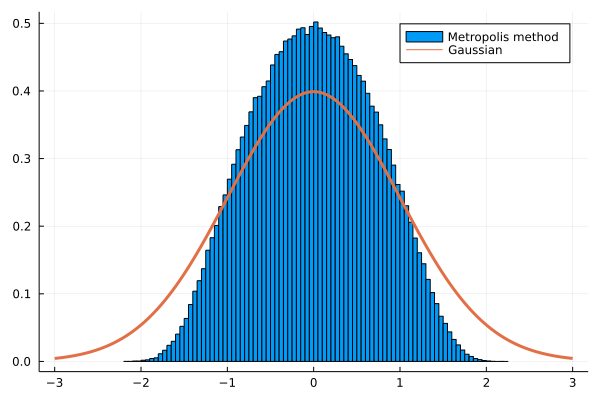

In [1]:
using Plots
using Random

function any_width_rand!(n_rand,width_l,width_r)
    rands=zeros(n_rand)
    L=width_r - width_l
    for i=1:n_rand
        rands[i] = width_l + L*rand()
    end
    return rands
end

function action_cal(x)
    exp(0.5*x^2)
end

function MP_test(x_ini,x_pro)
    S_ini = action_cal(x_ini)
    S_pro = action_cal(x_pro)
    
    if exp(S_ini - S_pro) > rand()
        return x_pro
    else 
        return x_ini
    end
end

n_rand=1_000_000

MP_rands=zeros(n_rand)

x_propose  = 0.0
x_ini      = 0.0
width_rand = 2.0

@time for i=2:n_rand
    x_propose   = x_ini + any_width_rand!(1,-width_rand,width_rand)[1]
    MP_rands[i] = MP_test(x_ini,x_propose)
    x_ini       = MP_rands[i]
end

f(x) = exp(-0.5*x^2)/sqrt(2*pi)
xr   = range(-3,3,length=10001)

plot(MP_rands,st=:histogram,norm=:true,nbins=100,label="Metropolis method")
plot!(xr,f.(xr),lw=3,label="Gaussian")